# Plot graphs automatically
by Yuhang Lin

In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from apscheduler.schedulers.background import BackgroundScheduler
import time
import datetime
from plotcpu import plot_cpu

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from apis.getcpuinfonoscaling import cpuinfo

In [3]:
counter = 0
data = []
num_container = 4
for i in range(num_container):
    data.append([])

In [4]:
def get_data():
    cpu_data = cpuinfo()
    for i in range(num_container):
        data[i].append(cpu_data[i])

In [5]:
sched = BackgroundScheduler()
# data is retrieved every 1 second
sched.add_job(get_data, 'interval', seconds=1)
sched.start()
print(datetime.datetime.now())

2019-04-25 12:48:57.662161


In [6]:
len(data[1])

0

In [7]:
def plot_cpu(data):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    t = np.arange(0.01, len(data[0]), 1)
    
    ax1 = plt.subplot(411)
    plt.plot(t, data[0]) # container 0
    # make these tick labels invisible
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    # share x only
    ax2 = plt.subplot(412, sharex=ax1)
    plt.plot(t, data[1]) # container 1
    plt.setp(ax2.get_xticklabels(), visible=False)
    
    ax3 = plt.subplot(413, sharex=ax1)
    plt.plot(t, data[2]) # cotainer 2
    plt.setp(ax3.get_xticklabels(), visible=False)
    ax4 = plt.subplot(414, sharex=ax1)
    plt.plot(t, data[3]) # cotainer 3
    plt.setp(ax4.get_xticklabels(), visible=True)
  
    plt.show()

In [8]:
temp = cpuinfo()

2019-04-25 13:37:21.222376


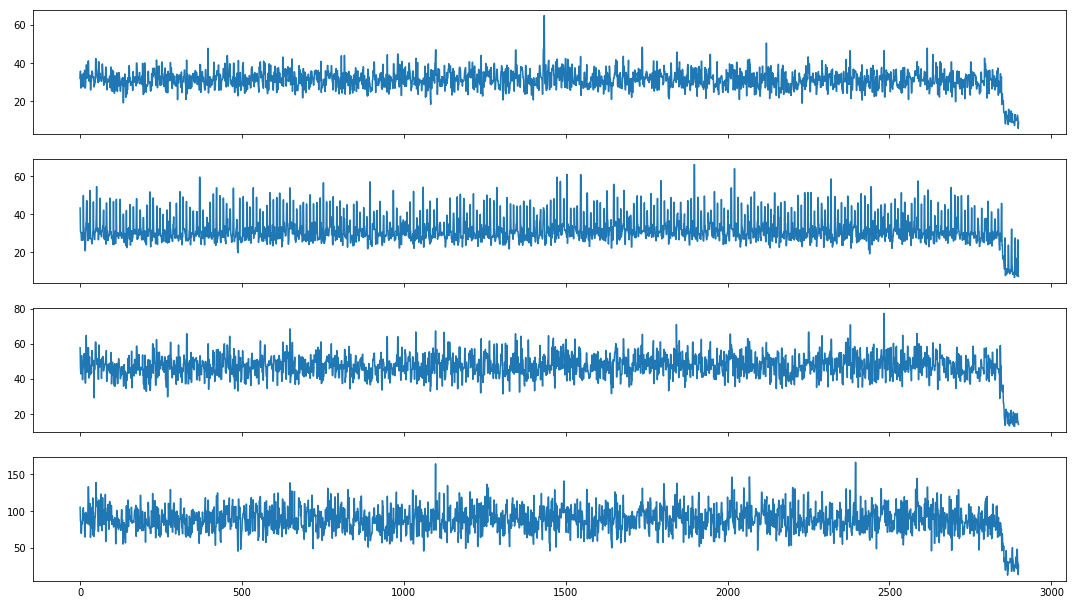

Job "get_data (trigger: interval[0:00:01], next run at: 2019-04-25 13:37:34 EDT)" raised an exception
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connectionpool.py", line 384, in _make_request
    six.raise_from(e, None)
  File "<string>", line 2, in raise_from
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connectionpool.py", line 380, in _make_request
    httplib_response = conn.getresponse()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/

Job "get_data (trigger: interval[0:00:01], next run at: 2019-04-25 13:37:36 EDT)" raised an exception
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/util/connection.py", line 79, in create_connection
    raise err
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/util/connection.py", line 69, in create_connection
    sock.connect(sa)
OSError: [Errno 113] No route to host

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packa

Job "get_data (trigger: interval[0:00:01], next run at: 2019-04-25 13:37:38 EDT)" raised an exception
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connection.py", line 171, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/util/connection.py", line 79, in create_connection
    raise err
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/util/connection.py", line 69, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/pyt

In [15]:
print(datetime.datetime.now())
plot_cpu(data)

2019-04-25 12:48:58.262950


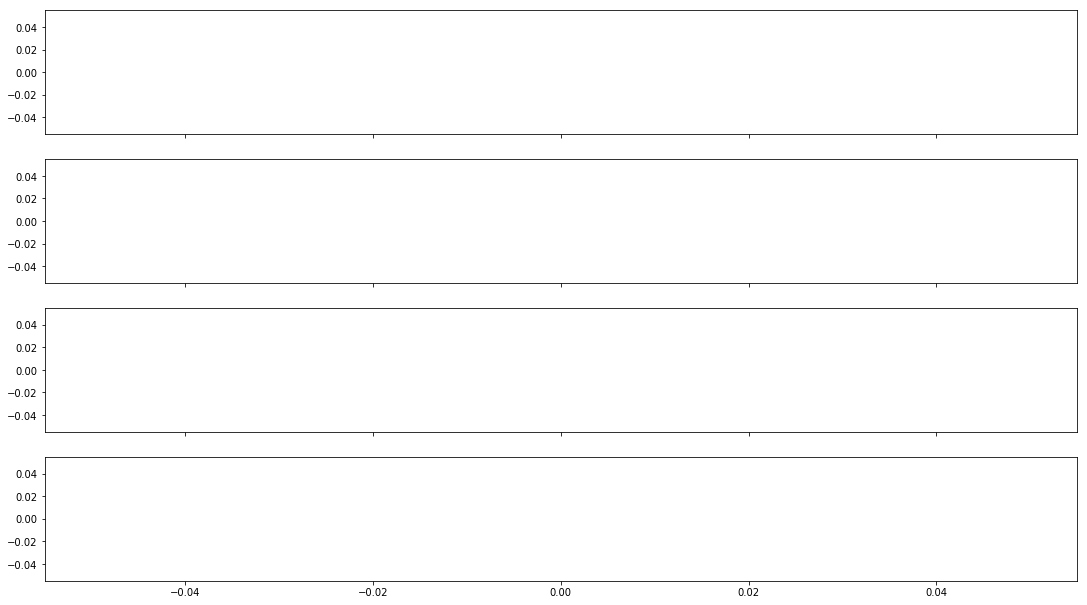

In [10]:
print(datetime.datetime.now())
plot_cpu(data)

In [11]:
# sched.shutdown() # shutdown the scheduler

In [12]:
# import csv
# for i in range(num_container):
#     with open("container" + str(i) + ".csv", "w") as file:
#         for line in data[i]:
#             file.write(str(line))
#             file.write('\n')